# Lecture 19 - Graphs

Thursday 2021/10/28

---

## ✨ Graph Data Structure

▶️ First, run the code cell below to import modules used for this demo.

In [23]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

Run the code below to ensure you're using a non-outdated version of Plotly.

In [2]:
# Install plotly 4.14.3 using pip
# Colab environment supports pip
if 'google.colab' in str(get_ipython()):
    !pip install plotly==4.14.3

# If you're using conda, use the code below
# !conda install -c plotly plotly=4.14.3

### 🚌 MTD Routes

Create a list of dictionaries containing the paths of MTD 22 (both south and north).

In [3]:
mtd_22_routes = [
    {
        "source": "Lincoln & Killarney",
        "target": "Goodwin & Clark"
    },
    {
        "source": "Goodwin & Clark",
        "target": "Illini Union"
    },
    {
        "source": "Illini Union",
        "target": "Third & Daniel"
    },
    {
        "source": "Third & Daniel",
        "target": "Gregory at Library"
    },
    {
        "source": "Gregory at Library",
        "target": "ISR"
    },
    {
        "source": "ISR",
        "target": "PAR"
    },
    {
        "source": "PAR",
        "target": "ISR"
    },
    {
        "source": "IR",
        "target": "Gregory at Library"
    },
    {
        "source": "Gregory at Library",
        "target": "Third & Daniel"
    },
    {
        "source": "Third & Daniel",
        "target": "Illini Union"
    },
    {
        "source": "Illini Union",
        "target": "University & Goodwin"
    },
    {
        "source": "University & Goodwin",
        "target": "Lincoln & Killarney"
    },
    
]

Create a DataFrame from the list of dictionaries.

In [4]:
edges = pd.DataFrame(mtd_22_routes)

edges

,source,target
0,Lincoln & Killarney,Goodwin & Clark
1,Goodwin & Clark,Illini Union
2,Illini Union,Third & Daniel
3,Third & Daniel,Gregory at Library
4,Gregory at Library,ISR
5,ISR,PAR
6,PAR,ISR
7,IR,Gregory at Library
8,Gregory at Library,Third & Daniel
9,Third & Daniel,Illini Union


### 🌐 Create a Graph object

Create a Graph object using `networkx`.

In [5]:
G = nx.from_pandas_edgelist(edges)

View nodes.

In [6]:
G.nodes()

NodeView(('Lincoln & Killarney', 'Goodwin & Clark', 'Illini Union', 'Third & Daniel', 'Gregory at Library', 'ISR', 'PAR', 'IR', 'University & Goodwin'))

View edges.

In [7]:
G.edges()

EdgeView([('Lincoln & Killarney', 'Goodwin & Clark'), ('Lincoln & Killarney', 'University & Goodwin'), ('Goodwin & Clark', 'Illini Union'), ('Illini Union', 'Third & Daniel'), ('Illini Union', 'University & Goodwin'), ('Third & Daniel', 'Gregory at Library'), ('Gregory at Library', 'ISR'), ('Gregory at Library', 'IR'), ('ISR', 'PAR')])

### 🔮 Visualize

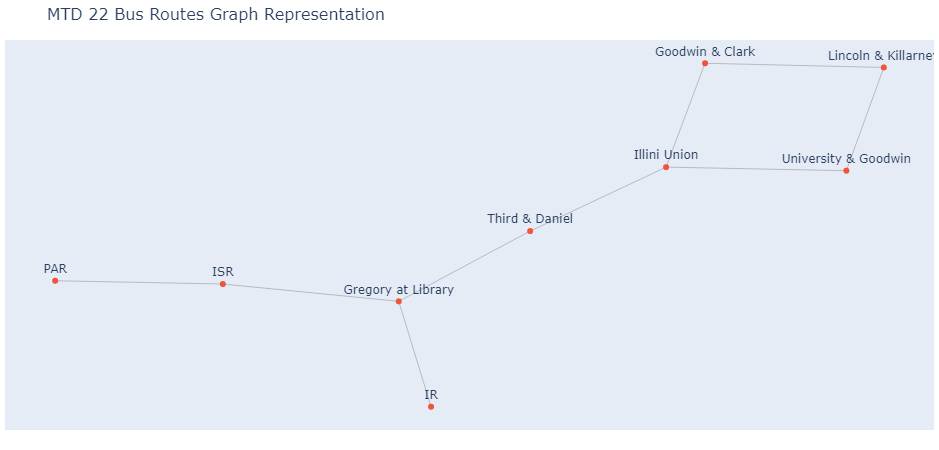

In [22]:
# position the nodes of a graph in two-dimensional space 
# so that all the edges are of more or less equal length 
# and there are as few crossing edges as possible
pos = nx.kamada_kawai_layout(G)

# assign positions calculated using the Kamada-Kawai layout
for n, p in pos.items():
    G.nodes[n]['pos'] = p

# create a blank Scatter object to draw lines
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

# add edge lines
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# create 
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="top center",
    hoverinfo='text',
)

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node])
    
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='MTD 22 Bus Routes Graph Representation',
        titlefont=dict(size=16),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()